In [120]:
# -*- coding: utf-8 -*-
import math, random
LENGTH = 19
ALPHA = 0.75
QUERY = 39
multiplier = 2

data = []
num = 1

for x in range(1, LENGTH + 1):
    offset = random.randint(1, multiplier)
    num += offset
    data.append(num)

data = [5,8,13,18,24,33,35,38,45,52,58,64,72,76,77,78,82,83,87,94,97,103,107]
    
tree  = []#[0] * (100) # == 2⁵ fucked up length
bottom_reached = False
depth = 0


def fillDFSRecursive(tree, data, init, end, v, index = 0, parent='root', branch=''):
    """ Recursive part """
    global depth
    global bottom_reached
    global ALPHA
    size = end - init
    if size == 0:
        if bottom_reached:
            return
        depth = v-1
        bottom_reached = True
        return
    pointer =  init + int(size * ALPHA)
    

    ## DEBUG PRINT
    """
    ---------
    init   : %s
    end    : %s
    v      : %s
    index  : %s
    size   : %s
    pointer: %s
    type index   :%s
    depth : %s
    reachedbottom : %s
    -------
    """ %(init, end, v, index, size, pointer, type(index),depth,bottom_reached)
    
    
    
    tree.append((parent, branch, data[pointer]))

    fillDFSRecursive(tree, data, init, pointer, v + 1, index + 1, data[pointer], 'left')
    # right branch
    fillDFSRecursive(tree, data, pointer + 1, end, v + 1, int(index + ALPHA*(size + 1)), data[pointer], 'right')
    

    


    
def fillDFS(tree, data):
    """ Main function for DFS """
    # ceil rounds to the nex tint
    fillDFSRecursive(tree, data, 0, len(data), 0)
    

def searchDFSRecursive(tree, query, index, size, possible_result):
    
    ## DEBUG PRINT
    """
    ---------
    index  : %s
    value  : %s
    size   : %s
    possible_result: %s
    type index   :%s
    -------
    """ %(index, tree[index], size, possible_result, type(index))
    
    if query == tree[index]: return query
    if size == 0: return possible_result;
    # branch left
    if query < tree[index]:
        return searchDFSRecursive(tree, query, index + 1, int(math.floor( ALPHA * size)), possible_result)

    else:
        possible_result = tree[index]
        return searchDFSRecursive(tree, query, int(index + 1 + math.floor(ALPHA * size)),
                                  int(math.ceil( (1 - ALPHA) * size)) - 1, possible_result)
   
    
def searchDFS(tree, query):
    return searchDFSRecursive(tree, query, 0, len(tree), -float('inf'))
    



# call to fill the array tree with the data

fillDFS(tree, data)

print "depth: "
print depth
print "\ndata: "
print data
fancy_tree = tree[:]
print "\nfancy_tree: "
print fancy_tree

tree = [x[2] for x in tree]
print "\narray tree"
print tree

result = searchDFS(tree, QUERY)
print "\nquery %s result %s "%(QUERY, result)
print result

depth: 
8

data: 
[5, 8, 13, 18, 24, 33, 35, 38, 45, 52, 58, 64, 72, 76, 77, 78, 82, 83, 87, 94, 97, 103, 107]

fancy_tree: 
[('root', '', 83), (83, 'left', 72), (72, 'left', 52), (52, 'left', 35), (35, 'left', 24), (24, 'left', 18), (18, 'left', 13), (13, 'left', 8), (8, 'left', 5), (24, 'right', 33), (35, 'right', 45), (45, 'left', 38), (52, 'right', 64), (64, 'left', 58), (72, 'right', 82), (82, 'left', 78), (78, 'left', 77), (77, 'left', 76), (83, 'right', 103), (103, 'left', 97), (97, 'left', 94), (94, 'left', 87), (103, 'right', 107)]

array tree
[83, 72, 52, 35, 24, 18, 13, 8, 5, 33, 45, 38, 64, 58, 82, 78, 77, 76, 103, 97, 94, 87, 107]

query 39 result 38 
38


In [115]:
len(tree)

19

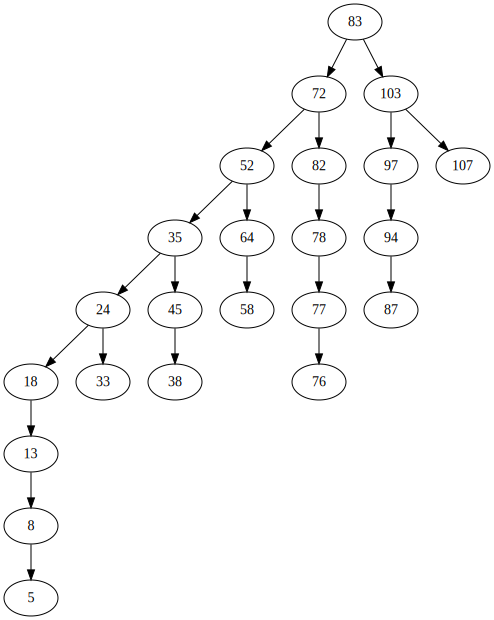

In [119]:

from graphviz import Digraph

dot = Digraph(comment='The Round Table')
for x in data:
    dot.node(str(x), str(x))


for x in fancy_tree:
    if type(x) == tuple:
        if x[0] != 'root':
            dot.edge(str(x[0]), str(x[2]))

dot


In [88]:
print tree

[0, ('root', '', 6), (6, 'left', 2), (2, 'left', 1), (2, 'right', 3), (3, 'right', 4), (4, 'right', 5), (6, 'right', 10), (10, 'left', 7), (7, 'right', 8), (8, 'right', 9), (10, 'right', 13), (13, 'left', 11), (11, 'right', 12), (13, 'right', 15), (15, 'left', 14), (15, 'right', 17), (17, 'left', 16), (17, 'right', 18), (18, 'right', 19)]


In [9]:
[6,2,1,3,4,5,10,7,8,9,13,11,12,15,14,17,16,18,19,]

ImportError: No module named pygraphviz